# EDA for Tweeter 

* Null check
* Label Ratio
* Word Cloud
* Tsne of text and Selected Text

In [6]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
data_path = '../data/train.csv'
df = pd.read_csv(data_path)

In [8]:
df.sample(3)

,textID,text,selected_text,sentiment
5757,bcdf349242,I didn`t get the job at Stuff Magazine Dammit...,"e Dammit, that would have been amazing!! Oh w...",neutral
17577,521dc18140,"oh look! traditional Chinese, it`s so charmin...","oh look! traditional Chinese, it`s so charming...",neutral
3808,e31dc39676,Laying on my bed. ONE spot smells like vanilla...,awesome,positive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [10]:
df.isnull().sum()


textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [11]:
df[df.text.isnull()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


* 4 columns : textID, text , selected_text, sentimetn
* few null

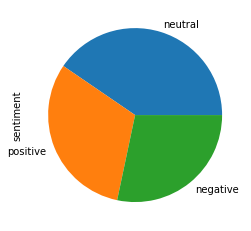

In [12]:
pd.value_counts(df.sentiment).plot.pie()

* Similar ratio

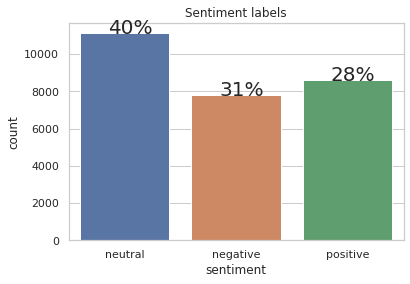

In [13]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns

nrow = df.shape[0]
sns.set(style='whitegrid')
ax = sns.countplot(x='sentiment',data=df)
ax.set_title('Sentiment labels')

for p, label in zip(ax.patches, round(df["sentiment"].value_counts()/nrow,2)):
    ax.annotate(str(round(label * 100)) + '%', (p.get_x()+0.25, p.get_height()+0.15), fontsize = 20)

### Preprocessing
* remove non alphanumeric character, links, lowercase
* https://medium.com/@sonicboom8/sentiment-analysis-torchtext-55fb57b1fab8
* https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert

In [14]:
import re

import torchtext
from torchtext import data
import spacy


nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])

def tweet_clean(text):
    text = text.lower()
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
    return text.strip()

def text_preprocess(text):
    return [w.text.lower() for w in nlp(tweet_clean(text))]

sentiment_dict = {"positive":0,"neutral":1,"negative":2}


In [15]:
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])

print("Original : {} \nCleaned : {} \nTokenized : {}".format(df.text[0] , tweet_clean(df.text[0]), nlp(tweet_clean(df.text[0]))))

Original :  I`d have responded, if I were going 
Cleaned : i d have responded if i were going 
Tokenized : i d have responded if i were going


In [16]:
df['text_clean'] = df['text'].apply(str).apply(lambda x : text_preprocess(x))
df['sentiment_encode'] = df['sentiment'].apply(str).apply(lambda x : sentiment_dict[x])
df['selected_text_clean'] = df['selected_text'].apply(str).apply(lambda x : text_preprocess(x))


In [17]:
df.sample(5)

,textID,text,selected_text,sentiment,text_clean,sentiment_encode,selected_text_clean
21157,1be391003e,unfortunately noy my life suck this year.,unfortunately,negative,"[unfortunately, noy, my, life, suck, this, year]",2,[unfortunately]
11533,98a78825ec,****. It`s raining again,****.,negative,"[it, s, raining, again]",2,[]
6698,6b04478b4d,Scary lightning and thunder I`m glad it`s ove...,glad,positive,"[scary, lightning, and, thunder, i, m, glad, i...",0,[glad]
19543,bb28798313,Burning time at wacha,Burning,negative,"[burning, time, at, wacha]",2,[burning]
5954,e14f7e2e0d,It didn`t start as a long message ... It just...,It didn`t start as a long message ... It just ...,neutral,"[it, didn, t, start, as, a, long, message, it,...",1,"[it, didn, t, start, as, a, long, message, it,..."


## Word Ratio, Wordcloud

In [18]:
from wordcloud import WordCloud


In [19]:
positive_text = df[df['sentiment'] == 'positive']['selected_text_clean']
negative_text = df[df['sentiment'] == 'negative']['selected_text_clean']
neutral_text = df[df['sentiment'] == 'neutral']['selected_text_clean']


In [108]:
all_text = []
for t in positive_text.values:
    all_text.extend(t)

In [116]:
temp = pd.DataFrame({'text':positive_text.sum()})

In [215]:
def VisualizeTopBar(visualize_val, visualize_col='selected_text_clean',top=20):
    visualize_data = df[df['sentiment'] == visualize_val][visualize_col]
    df_viz = pd.DataFrame({'text':visualize_data.sum()})
    
    total = df_viz.shape[0]
    top_df = pd.value_counts(df_viz.text)[:top]
    top_df = top_df/total
    df_final = pd.DataFrame({'word':top_df.index, 'ratio':top_df.values})
    plt.rcParams["axes.labelsize"] = 15

    plt.figure(figsize=(20,15))
    b = sns.barplot(x='word',y='ratio', data=df_final)
    b.set_title('{} word distiribution'.format(visualize_val),fontsize=30)
    b.set_xlabel("Words",fontsize=20)
    b.set_ylabel("Ratio",fontsize=20)
    b.tick_params(axis="x", labelsize=30, rotation= -30)
    b.tick_params(axis="y", labelsize=20)

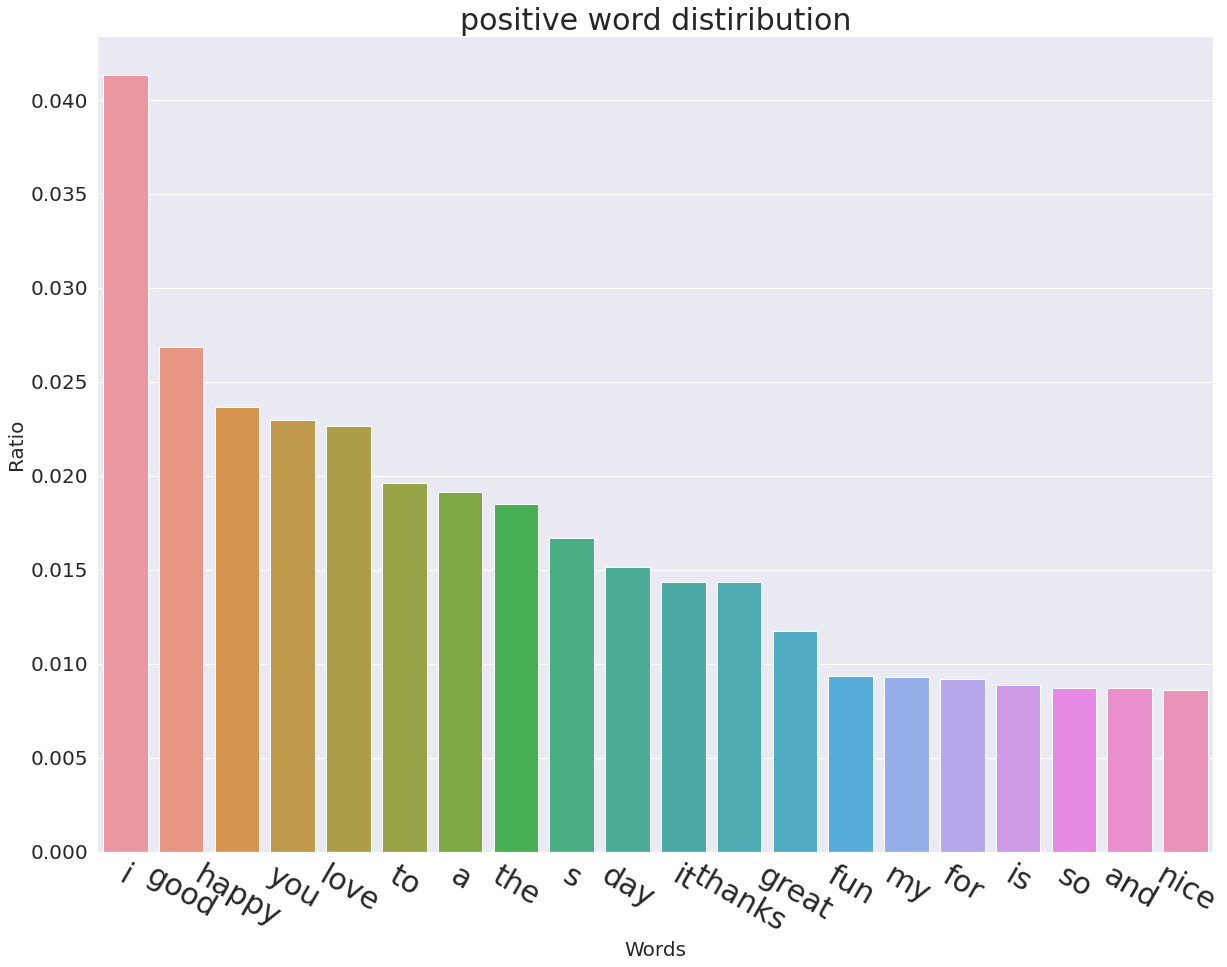

In [219]:
VisualizeTopBar('positive')

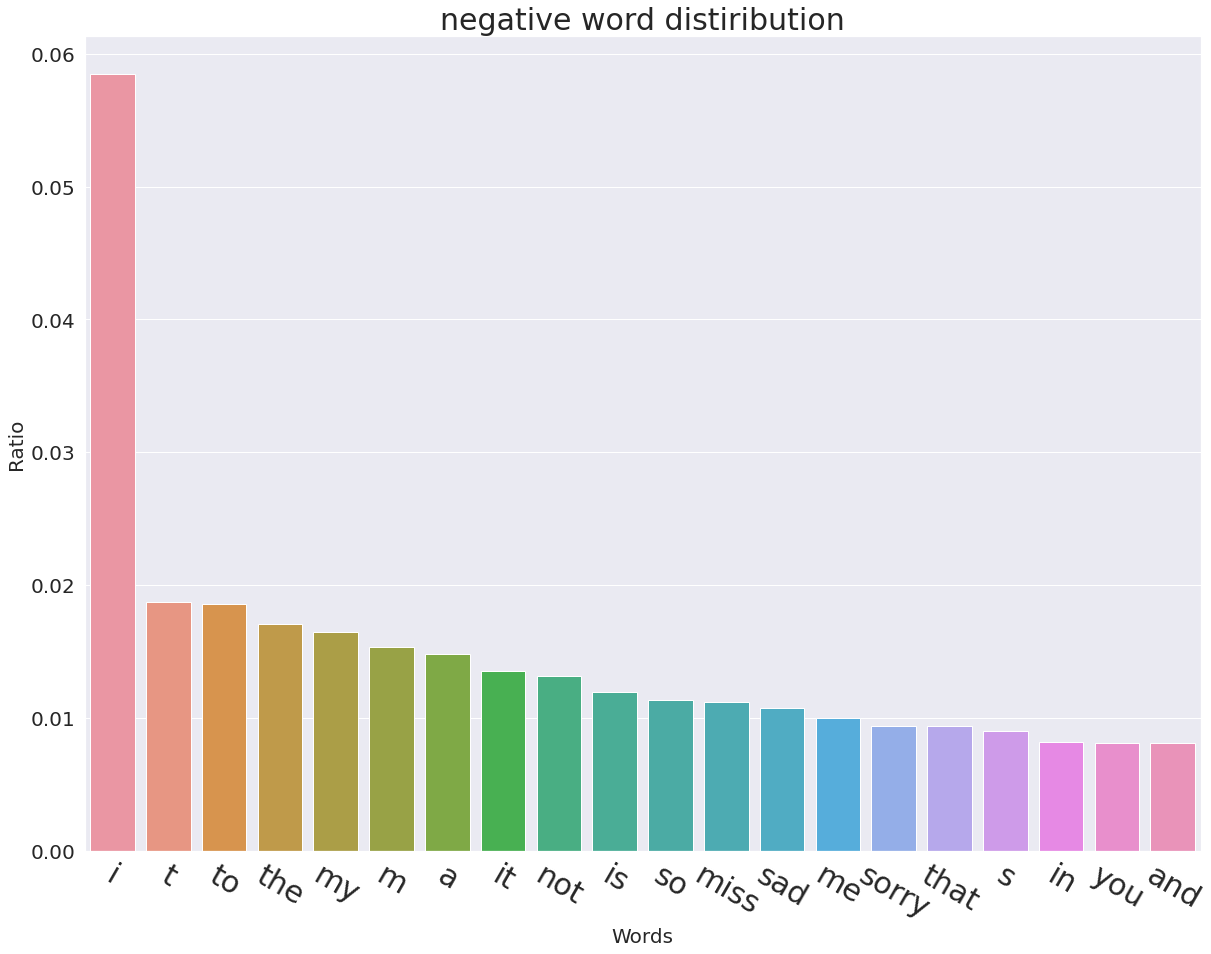

In [216]:
VisualizeTopBar('negative')

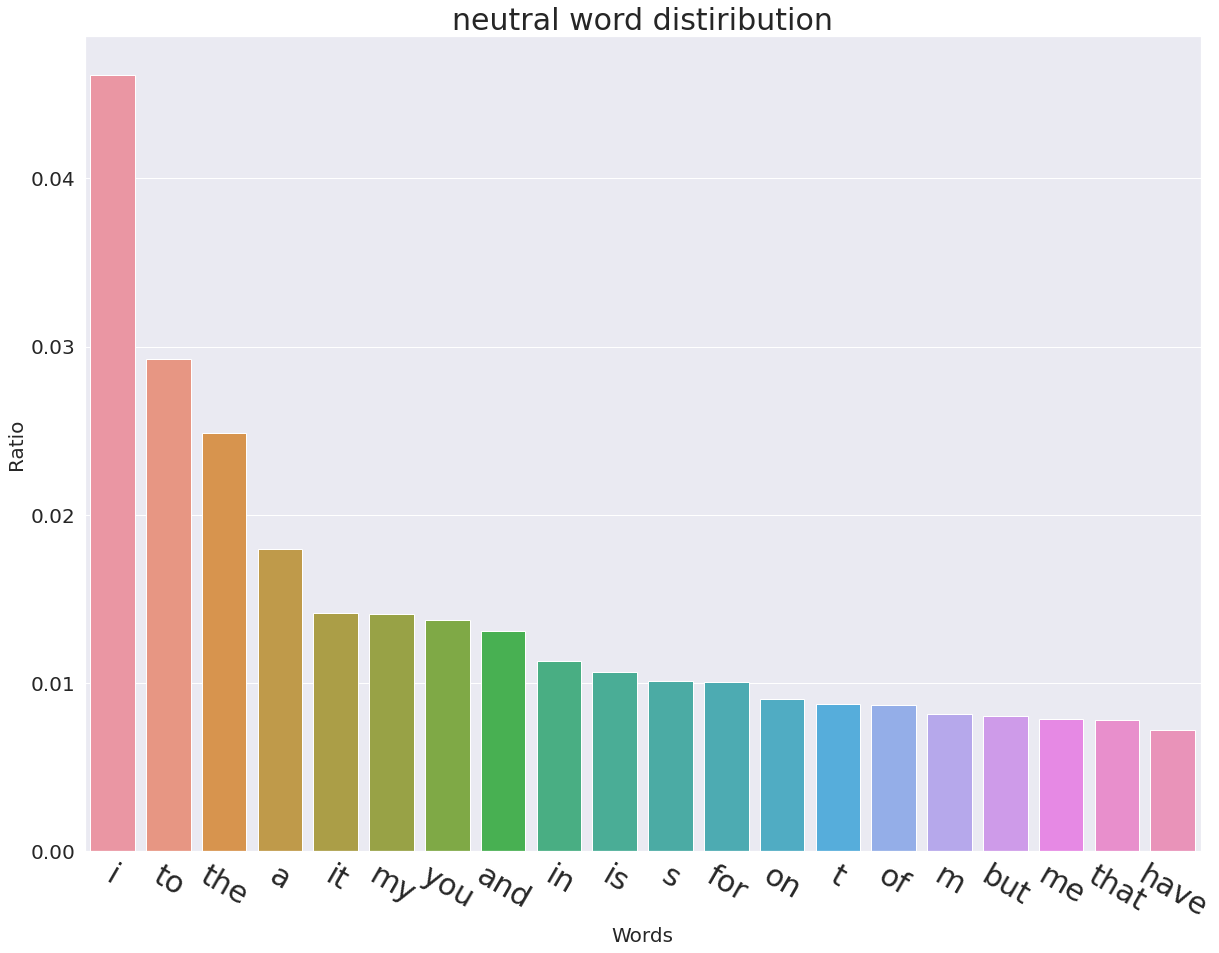

In [218]:
VisualizeTopBar('neutral')

* Too many stop words in each sentiment classes

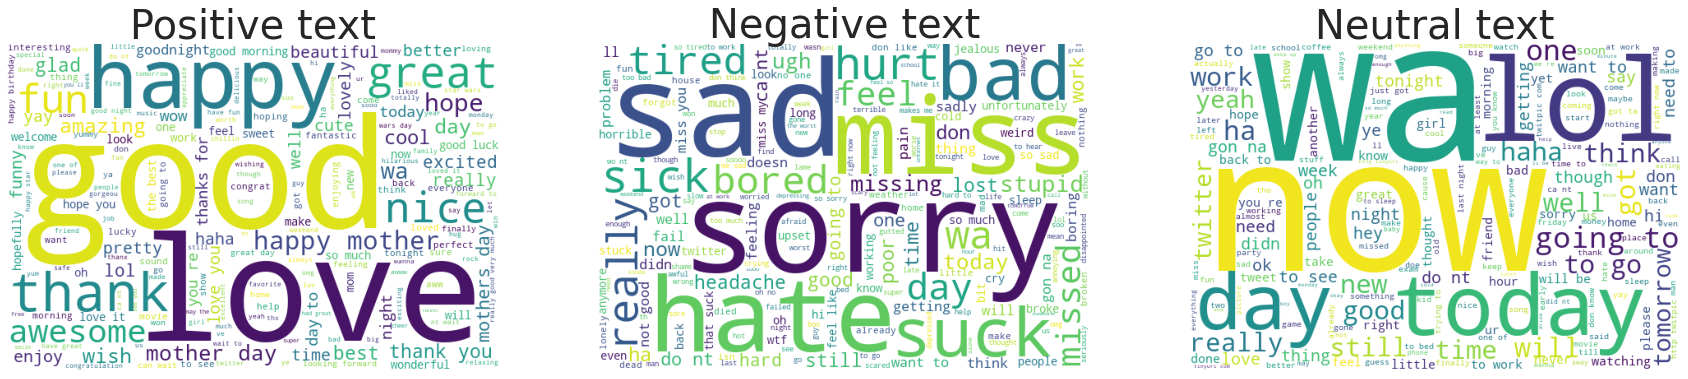

In [20]:
from wordcloud import WordCloud

visualize_data = df[df['sentiment'] == 'positive']['selected_text_clean']
positive_text_clean =visualize_data.sum()

visualize_data = df[df['sentiment'] == 'negative']['selected_text_clean']
negative_text_clean =visualize_data.sum()

visualize_data = df[df['sentiment'] == 'neutral']['selected_text_clean']
neutral_text_clean =visualize_data.sum()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud(background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive_text_clean))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative_text_clean))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral_text_clean))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=40);

* W위에 Graph랑 다른 결과가 나오는데 왠지 wordcloud는 stop word 제외한듯

### Word2vec T-sne
* 각 sentiment 상위 단어들 TSNE
* Sentiment 별로 sentence TSNE
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [21]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import nltk

In [22]:
df.sample()

,textID,text,selected_text,sentiment,text_clean,sentiment_encode,selected_text_clean
26100,f989342a49,nah the lights killed the mood now you got to...,the lights killed the mood,negative,"[nah, the, lights, killed, the, mood, now, you...",2,"[the, lights, killed, the, mood]"


In [23]:
STOP_WORDS = nltk.corpus.stopwords.words()


In [43]:



def clean_sentence(val):
    " remove stop words"
    
    sentence =[w for w in val]
    for word in list(val):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    data['selected_text_clean_no_stpwrds'] =  data['selected_text_clean'].apply(clean_sentence)
    
    return data

In [44]:
df_stop = clean_dataframe(df)

/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [46]:
df_stop[['selected_text','selected_text_clean_no_stpwrds']]

,selected_text,selected_text_clean_no_stpwrds
0,"I`d have responded, if I were going","[responded, going]"
1,Sooo SAD,"[sooo, sad]"
2,bullying me,[bullying]
3,leave me alone,"[leave, alone]"
4,"Sons of ****,",[sons]
...,...,...
27476,d lost,[lost]
27477,", don`t force",[force]
27478,Yay good for both of you.,"[yay, good]"
27479,But it was worth it ****.,[worth]


In [68]:
def build_corpus(data, col='selected_text_clean_no_stpwrds'):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data[col].iteritems():
        corpus.append(sentence[1])

    return corpus

In [69]:
corpus = build_corpus(df_stop)

In [105]:
model = word2vec.Word2Vec(corpus, size=100, window=10, min_count=1, workers=4)

In [106]:
model.wv['sooo']

array([ 0.270927  ,  0.05924876,  0.21505453, -0.03483841, -0.11578048,
        0.12510732,  0.03240786, -0.04882392,  0.14116424, -0.12939703,
        0.37976208,  0.27278447, -0.02669642, -0.03924291,  0.10652038,
       -0.19213542, -0.2295217 , -0.40766913,  0.01528267,  0.13948649,
       -0.00790251, -0.07100245,  0.02902873,  0.05787396, -0.30908212,
       -0.1306697 , -0.1818042 ,  0.05853677,  0.10925837, -0.1469967 ,
       -0.18064752, -0.11791533,  0.10426477,  0.02587103, -0.30280647,
        0.37624586,  0.2882051 ,  0.1546731 , -0.11621779,  0.10686364,
       -0.11196614, -0.05383366, -0.14357562, -0.0216626 ,  0.01932126,
        0.19488819, -0.1849091 , -0.03467516, -0.22312559, -0.00750342,
        0.27277136,  0.09008958, -0.02700042,  0.25263292, -0.13694954,
        0.40088657,  0.07593413,  0.05636501,  0.3632289 ,  0.14233758,
       -0.14367267,  0.10123302,  0.04971159,  0.01028507, -0.24820077,
        0.01972512, -0.02148977, -0.23672737,  0.00235369, -0.49

In [107]:
model.wv.most_similar('sad')

[('bad', 0.9999303221702576),
 ('today', 0.9999260902404785),
 ('love', 0.9999240636825562),
 ('made', 0.999922513961792),
 ('first', 0.9999207854270935),
 ('miss', 0.9999201893806458),
 ('us', 0.9999154806137085),
 ('w', 0.9999120831489563),
 ('long', 0.9999114274978638),
 ('best', 0.9999111890792847)]

In [108]:
model.wv.most_similar('nice')

[('love', 0.9999527335166931),
 ('today', 0.9999489784240723),
 ('tomorrow', 0.9999311566352844),
 ('ever', 0.9999299049377441),
 ('b', 0.9999277591705322),
 ('hope', 0.9999270439147949),
 ('best', 0.9999257326126099),
 ('another', 0.9999210834503174),
 ('miss', 0.999915361404419),
 ('bad', 0.9999139308929443)]

* nice , bad 비슷하게 나오고, Sad 와 Best 가 비슷하게 나옴
* embedding 바꾸던가 해야할듯

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


KeyboardInterrupt: 

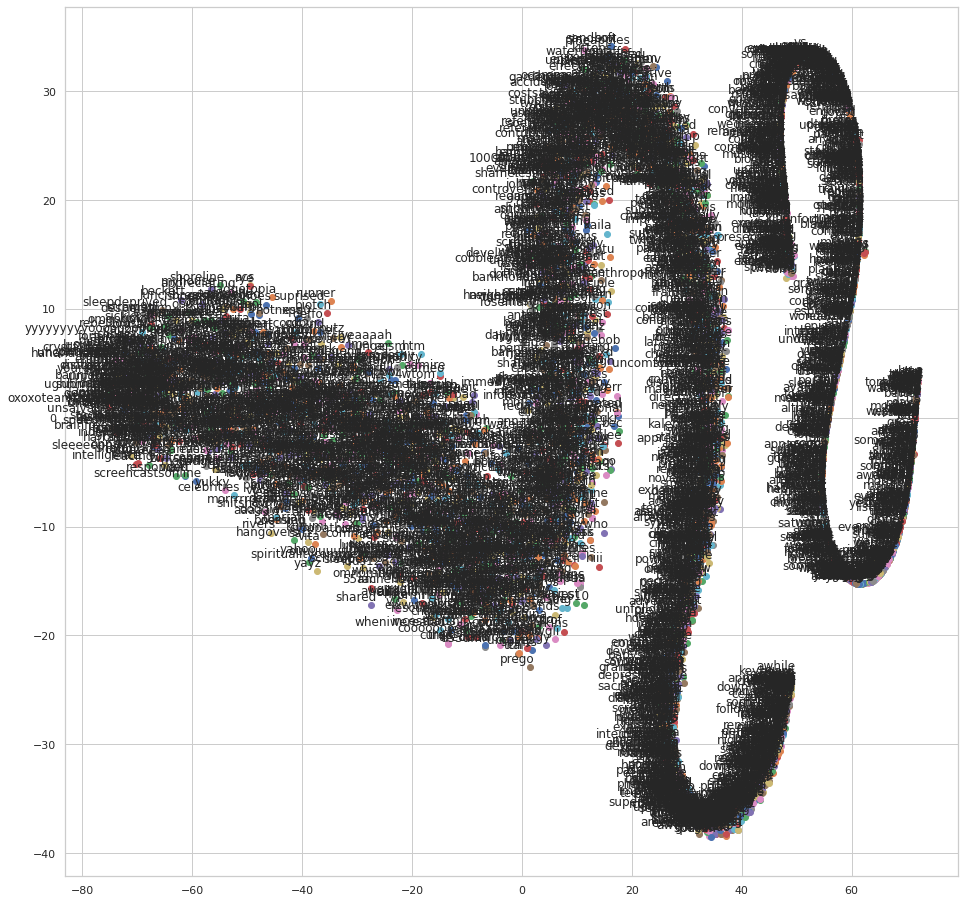

In [112]:
tsne_plot(model)

* Data preprocessing for 
* Sentence -> Words -> Tokens -> tokesn sum = sentence

In [149]:
def sentence2vectors(sentence):
    
    tokens = np.array([0.0]*100)
    for w in sentence:
        tokens += model[w]
    

    return tokens.tolist()
    
sentence_vecs = df_stop['selected_text_clean_no_stpwrds'].apply(lambda x : sentence2vectors(x))

/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [159]:
sentence_vecs = np.array(sentence_vecs.values.tolist())

In [176]:
tsne = TSNE(perplexity=10, n_components=2, init='pca',  random_state=23)
new_values = tsne.fit_transform(sentence_vecs)

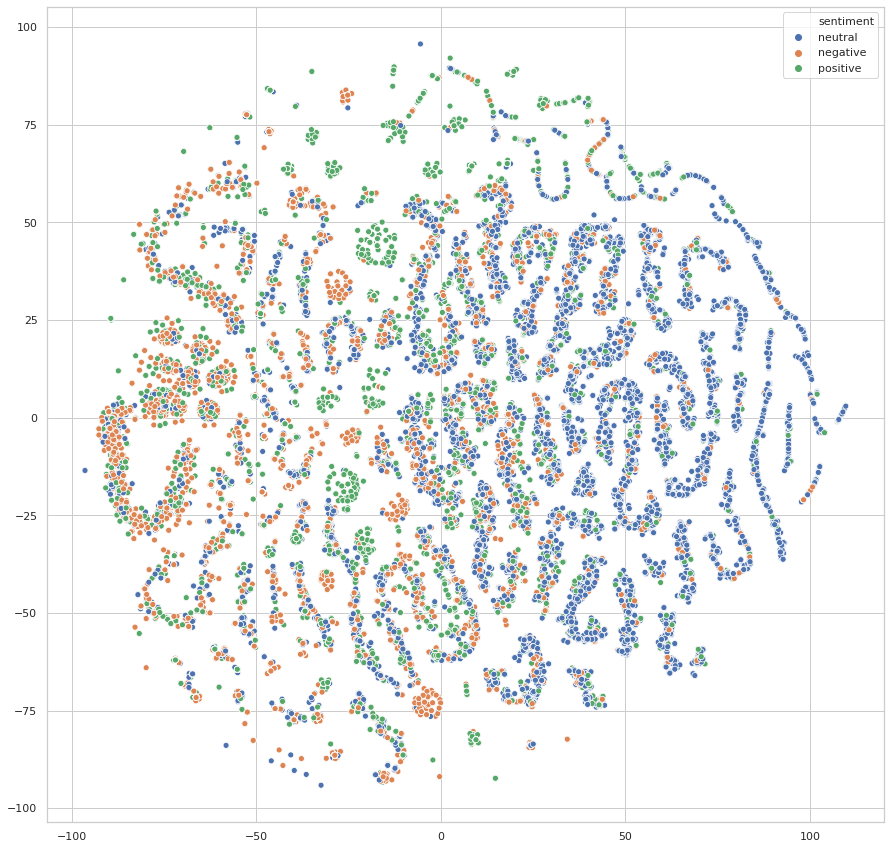

In [177]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=new_values[:,0], y=new_values[:,1], hue=df_stop['sentiment'])


* Neutral는 서로 모여 있고, Negative, Positive도 서로 모여있음

In [178]:
new_values[1]

array([ -6.103279, -51.358013], dtype=float32)